# 문제정의

- 데이터 전처리 및 시각화 방법에 대해 학습

# 데이터 수집

In [1]:
import pandas as pd

# index_col : 인덱스 컬럼을 설정
train = pd.read_csv("./data/titanic_train.csv", index_col="PassengerId")
test = pd.read_csv("./data/titanic_test.csv", index_col="PassengerId")

# 탐색적 데이터 분석 및 전처리

In [2]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


- 분석 feature : Pclass, Age, Name, SibSp, Parch, Fare, Ticket, Cabin, Embarked
- 예측 target label : Survived

- feature 

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string   
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>string 
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>      

## 탐색적 데이터 분석

- 데이터 이해를 이해하자
- 결측치 (컬럼에 값이 었는 데이터), 이상치 (다른 값들과 차이가 큰 값), 오류가 있는 확인
- 기술통계
- 상관관계
- 시각화

## 결측치 확인

- info(), describe(), isnull()과 sum() 함수 등을 이용

In [3]:
# 훈련 데이터의 결측치
train.info()

# Age, Cabin, Embarked에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# 테스트 데이터의 결측치 확인
test.info()

# Age, Fare, Cabin에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- 결측치 채우는 방법
  - 수치형인 경우
    - 기술통계 (평균, 중간값)
    - 결측치가 적은 경우 : 전체 평균이나 중간값을 대입
    - 결측치가 많은 경우 : 결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는 데이터의 결측치 통계를 사용
  
  - 범주형인 경우
    - 결측치가 적은 경우 : 데이터수가 가장 많은 클래스로 할당 -> 기존 데이터가 결측치가 있는 데이터에 의해 영향을 덜 받기 때문에)
    - 결측치가 많은 경우 : 데이터수가 가장 많은 클래스로 할당 -> 편향이 됨 -> 기존 데이터의 개수 비율만큼 랜덤으로 할당

In [5]:
# 결측치 개수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# 등급별(Pclass) 통계 (평균)
# groupby() : 원하는 컬럼을 중심으로 그룹핑해주는 함수
# Pclass 컬럼의 클래스별로 각 컬럼의 평균을 계산
train.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


- 1등실 생존율이 높았다
- 나이를 보면 3등실에 나이가 적은 승객이 많았다
- 1등실일수록 가족수가 적었다, 3등실일수록 가족수가 많았다

In [10]:
train.groupby(["Pclass", "Survived"]).mean()

Age     SibSp     Parch       Fare
Pclass Survived                                          
1      0         43.695312  0.287500  0.300000  64.684007
       1         35.368197  0.492647  0.389706  95.608029
2      0         33.544444  0.319588  0.144330  19.412328
       1         25.901566  0.494253  0.643678  22.055700
3      0         26.555556  0.672043  0.384409  13.669364
       1         20.646118  0.436975  0.420168  13.694887

- 3등실 승객의 사망/생존자의 요금은 비슷하다
- 1등실 승객의 사망/생존자의 요금은 생존자의 요금이 더 비쌌다
- 같은 클래스에서는 나이가 어릴수록 생존이 높았다

## Age 결측치 채우기

- 결측치가 있는 데이터의 다른 컬럼의 값과 같은 데이터의 평균값을 사용해서 결측치를 채움

- 그럼 어떤 컬럼을 참조할까요 ?
  - 결측치가 있는 컬럼(Age)과 상관관계가 높은 컬럼 선택 (범주형)
  
- 피벗 테이블을 활용   

- apply()을 이용하여 전체 데이터에 결측치를 채움
  - 데이터프레임의 데이터를 분리해서 원하는 처리를 수행한 후 다시 병합하는 함수 - 재구조화 함수 (reconstruct function)

In [11]:
# Age 컬럼과 상관관계가 높은 컬럼 찾기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# 피벗 테이블 생성
# values : 결측치를 채울 컬럼
# index : 참고할 컬럼 목록 리스트
# aggfunc : 사용할 수학 도구 (평균, 중간값)
pt1 = train.pivot_table(values = "Age",
                        index = ["Pclass", "Sex"],
                        aggfunc = "mean")

pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [13]:
# 피벗 테이블에 접근하는 방법
pt1.loc[1, "male"]

Age    41.281386
Name: (1, male), dtype: float64

In [14]:
import numpy as np

# Age 컬럼의 결측치를 채우는 함수
def fill_age(row) :
    # 한 줄 데이터에서 Age 컬럼이 결측치라면
    if np.isnan(row["Age"]) :
        # 피벗 테이블을 참조 (같은 Pclass와 Sex인 값을 반환)
        return pt1.loc[row["Pclass"], row["Sex"]]
    # 결측치가 아닌 경우
    else :
        return row["Age"]        

In [15]:
# axis=1 : 한 줄씩 넘긴다
# astype("int64") : 나이는 실수가 없으니 정수로 변환
train["Age"] = train.apply(fill_age, axis=1).astype("int64")
test["Age"] = test.apply(fill_age, axis=1).astype("int64")

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


## train 데이터의 Embarked 결측치 채우기

In [18]:
# 가장 많은 데이터수를 갖는 클래스(S)로 결측치를 할당
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# Embarked 컬럼이 결측치인 값을 S로 채운다
train["Embarked"] = train["Embarked"].fillna("S")

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


## test 데이터의 Fare 결측치 채우기

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [22]:
# 결측치가 있는 데이터를 확인
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [23]:
pt2 = test.pivot_table(values = "Fare",
                        index = ["Pclass", "Embarked"],
                        aggfunc = "mean")

pt2

Fare
Pclass Embarked            
1      C         110.073511
       Q          90.000000
       S          76.677504
2      C          20.120445
       Q          11.273950
       S          23.056090
3      C          10.658700
       Q           8.998985
       S          13.913030

In [24]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [25]:
test["Fare"] = test["Fare"].fillna(float(pt2.loc[3, "S"]))

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


## Cabin 결측치 채우기
- 결측치가 실제 객실이 없는 승객이었을 가능성이 있으므로 원래값에 중복되지 않는 영문자 채움
- 원래 객실번호의 첫번째 영문자 추출

In [27]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
# 결측치를 M으로 채움
train["Cabin"] = train["Cabin"].fillna("M")
test["Cabin"] = test["Cabin"].fillna("M")

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [31]:
# 원래 객실번호의 첫번째 영문자 추출
train["Cabin"] = train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]

In [32]:
train["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

2022.07.18

## 데이터 시각화 하기 ^^
- test데이터를 활용하지 않고 train데이터를 이용해서 시각화/탐색하는게 좋다.

### 범주형 데이터 시각화
    - 범주형 데이터 : 정해진 범위 안에서 등장( ex> 이름, 혈액형, 사는 곳, 학점, 등급 ~ )
    - 수치형 데이터 : 보통 데이터의 최대값, 최소값이 정해져 있지 않은 범위가 정해지지 않은 데이터
- 빈도기반의 bar chart를 많이 활용

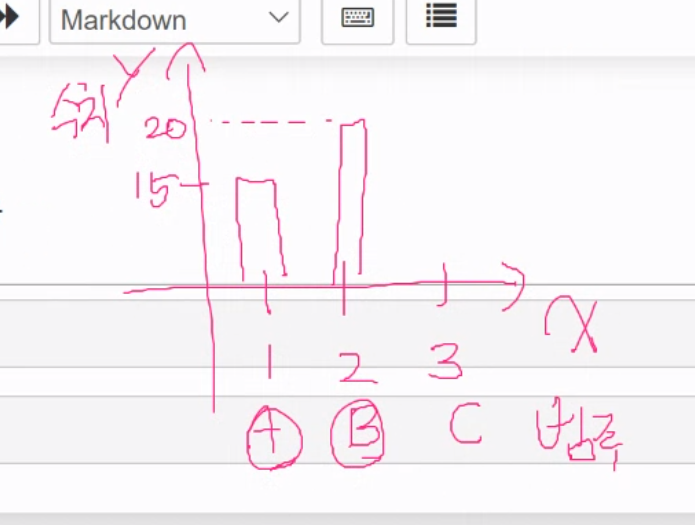

In [33]:
# matplotlib 기반의 데이터 시각화 라이브러리
import seaborn as sns

#### Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

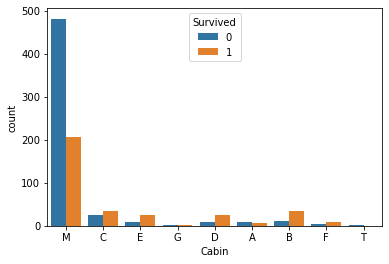

In [34]:
sns.countplot(data = train,     # 사용할 데이터 지정
              x = 'Cabin',      # x축에서 범주로 사용할 컬럼 지정
              hue = 'Survived'  # 각 범주를 분리할 컬럼 지정
              )

- B,D 같은 경우는 살아남기에 괜찮은 객실일 수 있다.
- M 같은 경우는 죽은사람들의 비율이 엄청 높다.

#### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

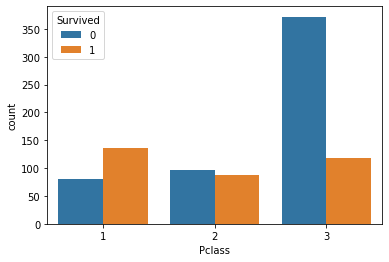

In [35]:
sns.countplot(data = train,     # 사용할 데이터 지정
              x = 'Pclass',      # x축에서 범주로 사용할 컬럼 지정
              hue = 'Survived'  # 각 범주를 분리할 컬럼 지정
              )

- 1등급은 산사람의 비율이 좀더 높고, 3등급은 죽은사람의 비율이 좀 더 높다.

#### Cabin & Pclass 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

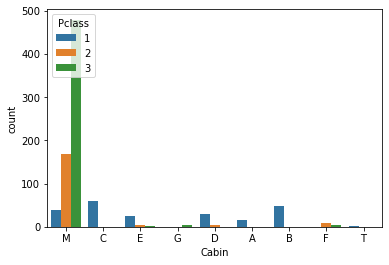

In [36]:
sns.countplot(data = train,     # 사용할 데이터 지정
              x = 'Cabin',      # x축에서 범주로 사용할 컬럼 지정
              hue = 'Pclass'  # 각 범주를 분리할 컬럼 지정
              )

- M에는 3등급이 많이 있어서 죽은사람의 비율이 높아보인거 같다.
- M이 생존여부 판단에는 도움이 덜 될 수 있겠다.

### 수치형 데이터 시각화
- 구간을 나눠서 종합하는 히스토그램
- 커널밀도 추정 그래프(데이터의 현재 분포를 보고 데이터를 추정하는 그래프)

#### matplotlib hist 함수

In [37]:
import matplotlib.pyplot as plt

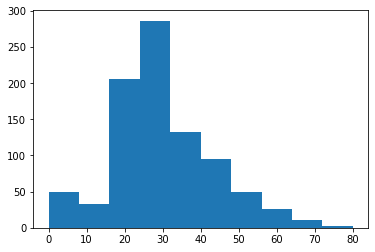

In [38]:
plt.hist(train['Age'], bins = 10)
plt.show()

#### seaborn histplot 함수

<AxesSubplot:xlabel='Age', ylabel='Count'>

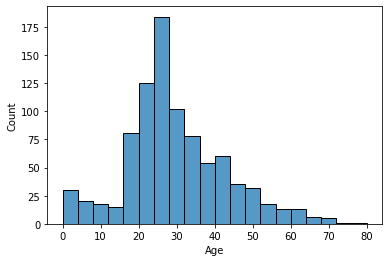

In [39]:
sns.histplot(data=train['Age'], bins=20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

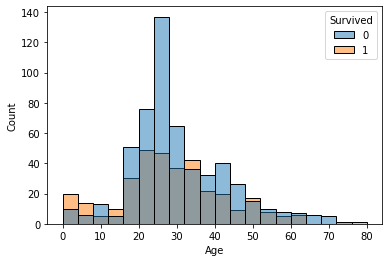

In [40]:
sns.histplot(data=train, x=train['Age'], bins=20, hue='Survived')

- 20대 중~후반의 사람들이 죽은 비율이 높다.
- 10살 미만의 사람들이 산 비율이 약간 높다.

#### 커널밀도추정 그래프 시각화

<AxesSubplot:xlabel='Fare', ylabel='Density'>

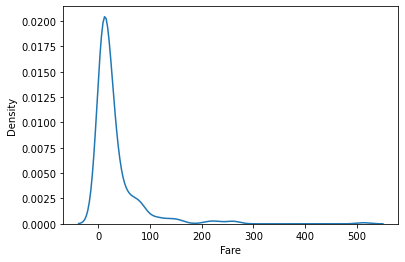

In [41]:
# 요금 데이터 시각화
sns.kdeplot(data=train, x=train['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

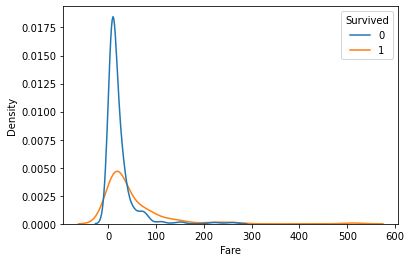

In [42]:
sns.kdeplot(data=train, x=train['Fare'], hue='Survived')

- 0~40달러사이의 사람은 죽은 사람의 밀도가 높다.
- 200달러 이상의 사람은 산 사람의 밀도가 아주 살짝 높다.

#### 바이올린플롯 그래프 시각화
- 박스 + KDE 그래프

<AxesSubplot:xlabel='Sex', ylabel='Age'>

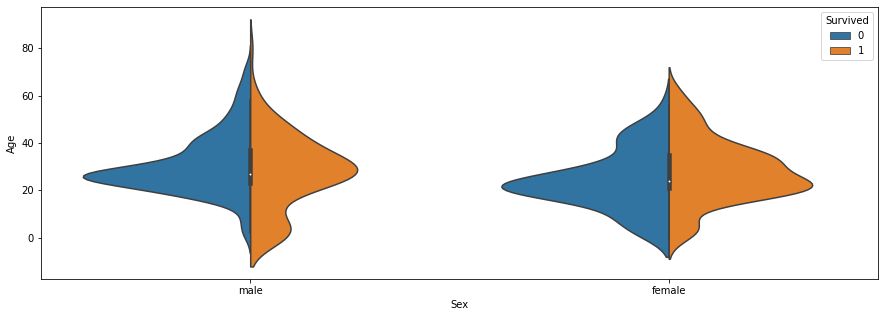

In [43]:
plt.figure(figsize=(15,5)) # 그림의 가로, 세로 크기 설정
sns.violinplot(data=train, # 사용할 데이터
               x = 'Sex',
               y = 'Age',
               hue = 'Survived', 
               split=True)

### 텍스트 데이터
- 비정형 데이터는 단어중심 시각화
- wordcloud
- 빈도기반의 시각화 활용가능

# 특성공학
- feature에서 유의미한 컬럼을 추출하거나 병합하는 행위

In [44]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 가족 컬럼을 만들어보자.
- SibSp와 Parch를 병합하자

<AxesSubplot:xlabel='SibSp', ylabel='count'>

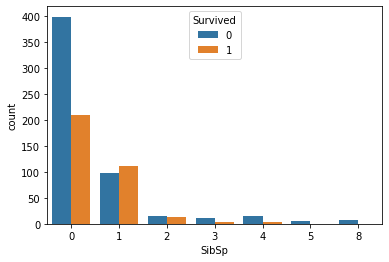

In [45]:
sns.countplot(data=train, 
              x='SibSp', 
              hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

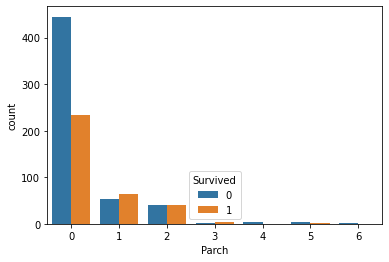

In [46]:
sns.countplot(data=train, 
              x='Parch', 
              hue='Survived')

In [47]:
# 형제,배우자,부모,자식을 모두 합쳐 가족이라는 새로운 컬럼생성
train['Family'] = train['SibSp'] + train['Parch']

<AxesSubplot:xlabel='Family', ylabel='count'>

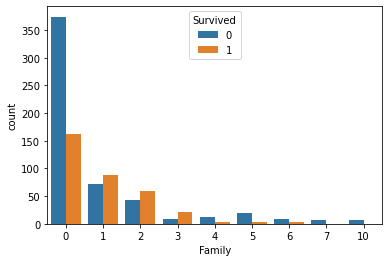

In [48]:
sns.countplot(data=train, 
              x='Family', 
              hue='Survived')

### Cut함수를 이용한 Binning(수치 -> 범주)
- 사소한 관찰 오류를 줄여줄 수 있다.(모델의 단순화를 유도)

In [49]:
bins = [-1,0,3,20] # 데이터를 잘라낼 구간정보 설정
labels = ['Alone', 'Small', 'Large'] # 구간별 범주 이름
cut_result = pd.cut(x=train['Family'], # 구간화할 데이터 설정
                    bins=bins, # 잘라낼 구간정보 설정
                    labels=labels) # 구간별 범주 이름 설정

In [50]:
cut_result

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [51]:
train['Family_cat'] = cut_result

<AxesSubplot:xlabel='Family_cat', ylabel='count'>

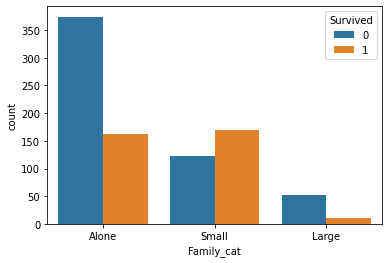

In [52]:
sns.countplot(data=train, 
              x='Family_cat', 
              hue='Survived')

In [53]:
test['Family'] = test['SibSp'] + test['Parch']
bins = [-1,0,3,20] # 데이터를 잘라낼 구간정보 설정
labels = ['Alone', 'Small', 'Large'] # 구간별 범주 이름
cut_result = pd.cut(x=test['Family'], # 구간화할 데이터 설정
                    bins=bins, # 잘라낼 구간정보 설정
                    labels=labels) # 구간별 범주 이름 설정

In [54]:
test['Family_cat'] = cut_result

## 비정형 데이터 다루기(Name)
- 정형화 해야함
- 이름 중간에 호칭을 추출해서 사용해보자.

In [55]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [56]:
def split_title(row):
    return row.split(",")[1].split(".")[0].strip()

In [57]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

### countplot 시각화

<AxesSubplot:xlabel='Title', ylabel='count'>

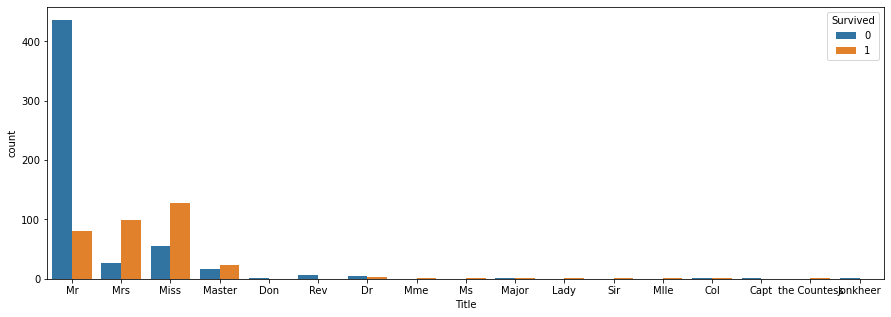

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(data=train,
              x='Title',
              hue='Survived')

In [59]:
# 일부 수치가 적은 호칭을 Other로 통일하자.
# Mr, Mrs, Miss, Master, Rev, Other

In [60]:
# map 함수 이용하기(데이터 치환시 사용)
title_dic = {
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Rev" : "Rev"
}

In [61]:
title_mapping = train['Title'].map(title_dic)
title_mapping[title_mapping.isnull()]

PassengerId
31     NaN
246    NaN
318    NaN
370    NaN
399    NaN
444    NaN
450    NaN
537    NaN
557    NaN
600    NaN
633    NaN
642    NaN
648    NaN
661    NaN
695    NaN
711    NaN
746    NaN
760    NaN
767    NaN
797    NaN
823    NaN
Name: Title, dtype: object

In [62]:
train['Title'] = title_mapping.fillna("Other")

In [63]:
# test 적용
title_mapping = test['Title'].map(title_dic)
test['Title'] = title_mapping.fillna("Other")

In [64]:
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']
['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']


### 사용하지 않을 컬럼 정리

In [65]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [66]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [67]:
train.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [68]:
test.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [69]:
print("train columns :", train.columns)
print("test columns :", test.columns)

train columns : Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')
test columns : Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family',
       'Family_cat', 'Title'],
      dtype='object')


# 모델링(7/19 오전)
- 인코딩(문자형태의 데이터를 숫자형태로 변환)
    1. label encoding(라벨인코딩)
    2. one-hot encoding(원핫인코딩)
- 특성선택(feature selection)
- 모델선택 및 하이퍼파라미터 튜닝
- 모델학습 및 평가

- 범주형 데이터
  - 순서가 있는 범주형 데이터 : label encoding을 활용 
                               - (크기 존재) ( ex> 학점 )
  - 순서가 없는 범주형 데이터 : one-hot encoding을 활용
                               - (모두가 동등한 개념으로 학습해야할 때) ( ex> 성별, 혈액형 )
- 특성선택
  - 상관계수가 양수이면 비례
  - 상관계수가 음수이면 반비례
  - 상관계수가 0이면 비례,반비례하지 않음
- 모델선택 및 하이퍼파라미터 튜닝
  

## 인코딩

In [70]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')

In [71]:
# 인코딩할 컬럼명만 선택
categorical_features = ['Sex', 'Cabin','Embarked', 'Family_cat', 'Title']

In [72]:
pd.get_dummies(train['Sex'])

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [73]:
# 반복문으로 인코딩하기
for feature_name in categorical_features :
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name)
    train = pd.concat([train,one_hot], axis=1)        # 기존 데이터 끝에 one_hot을 붙임
    train.drop(feature_name, axis=1, inplace=True)   # 기존 글자 컬럼 삭제

In [74]:
train.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Embarked_S,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22,7.2500,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,1,1,38,71.2833,1,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,3,26,7.9250,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,1,1,35,53.1000,1,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
5,0,3,35,8.0500,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [75]:
for feature_name in categorical_features :
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name)
    test = pd.concat([test,one_hot], axis=1)        # 기존 데이터 끝에 one_hot을 붙임
    test.drop(feature_name, axis=1, inplace=True)   # 기존 글자 컬럼 삭제 

In [76]:
test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_S,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
893,3,47,7.0000,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,9.6875,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
895,3,27,8.6625,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,12.2875,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [77]:
train.shape, test.shape

((891, 28), (418, 26))

In [78]:
# 집합연산으로 다른 컬럼을 확인해보자.
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [79]:
# 훈련용 데이터는 Cabin에 T가 존재했지만
# 테스트 데이터는 Cabin에 T가 없어서 one-hot 인코딩시 컬럼이 안 만들어졌다.
# 테스트 데이터 끝에 Cabin_T를 추가하자
test['Cabin_T'] = 0

In [80]:
test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
893,3,47,7.0000,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
894,2,62,9.6875,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
895,3,27,8.6625,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
896,3,22,12.2875,2,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [81]:
# 훈련용 데이터와 테스트 데이터의 인덱스 순서가 다르기 때문에 정렬해주자.
train.sort_index(axis=1, inplace=True)
test.sort_index(axis=1, inplace=True)

In [82]:
train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_Alone', 'Family_cat_Large',
       'Family_cat_Small', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Survived', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Rev'],
      dtype='object')

In [83]:
test.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_Alone', 'Family_cat_Large',
       'Family_cat_Small', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

## 특성선택
- 예측결과에 영향을 줄 특성들을 골라본다.
- Family와 Family_cat이 비슷한 특성이기 때문에 선택해보자.

### 문제와 답 만들기

In [84]:
X_train = train.drop(['Survived', 'Family'], axis=1)
y_train = train.Survived        # y_train = train['Survived']
X_test = test.drop('Family', axis=1)

In [85]:
X_train.shape, y_train.shape

((891, 26), (891,))

In [86]:
X_test.shape

(418, 26)

## 학습
- KNN모델과 DecisionTree모델 활용

In [87]:
from sklearn.neighbors import KNeighborsClassifier     # 모델이 예측하는 결과가 분류이기에(수치라면 회귀라서 KNeighborsRegressor)
from sklearn.tree import DecisionTreeClassifier

In [88]:
# 모델 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [89]:
# 모델 학습
# 지도학습이므로
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
# 모델 예측
knn_pre = knn_model.predict(X_test)
tree_pre = tree_model.predict(X_test)

In [91]:
# 정답파일 만들기
submission = pd.read_csv('./data/gender_submission.csv')

In [92]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
submission['Survived'] = knn_pre

In [94]:
# 데이터프레임을 csv파일로 저장
submission.to_csv("./data/knn_pre.csv", index=False)

In [95]:
submission['Survived'] = tree_pre
submission.to_csv("./data/tree_pre.csv", index=False)

- 피처 스케일링과 정규화(p.122)

#### 데이터 스케일링
- 각 feature의 스케일이 다르면 예측결과가 안좋은 경우가 있다.
- KNN, SVM, 신경망모델, Clustering 모델 등

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
# 스케일러 생성 (평균과 표준편차)
std_scaler = StandardScaler()

In [98]:
# 기준값 생성 (평균, 표준편차)
std_scaler.fit(X_train[['Fare']])

StandardScaler()

In [99]:
# 데이터 변형
scaled_fare = std_scaler.transform(X_train[['Fare']])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

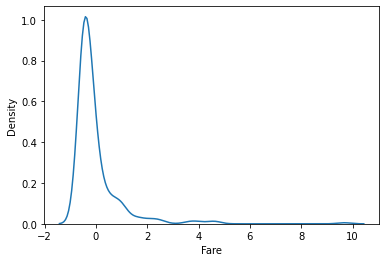

In [100]:
X_train['Fare'] = scaled_fare
sns.kdeplot(data=X_train, x='Fare')

In [101]:
# 테스트 데이터 변형
scaled_fare = std_scaler.transform(X_test[['Fare']])
X_test['Fare'] = scaled_fare

<AxesSubplot:xlabel='Fare', ylabel='Density'>

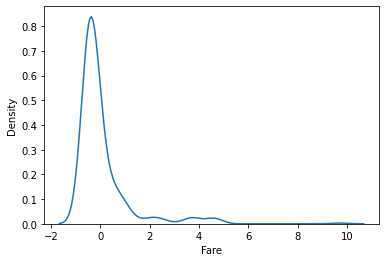

In [102]:
sns.kdeplot(data=X_test, x='Fare')

In [103]:
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
knn_pre = knn_model.predict(X_test)
tree_pre = tree_model.predict(X_test)

In [105]:
submission = pd.read_csv('./data/gender_submission.csv')

In [106]:
submission['Survived'] = knn_pre
submission.to_csv("./data/knn_pre1.csv", index=False)

In [107]:
submission['Survived'] = tree_pre
submission.to_csv("./data/tree_pre1.csv", index=False)

In [108]:
scaled_fare = std_scaler.transform(X_test[['Fare']])
X_test['Fare'] = scaled_fare

In [109]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train,y_train)
knn_pre2 = knn_model2.predict(X_test)
submission['Survived'] = knn_pre2
submission.to_csv("./data/knn_pre3.csv", index=False)

## 하이퍼 파라미터 튜닝
- KNN모델과 DecisionTree모델을 최적화해보자.
- KNN : 이웃숫자
- Tree : 나무의 깊이, 리프노드의 개수, 한 리프노드에 들어갈 샘플 수 등

### 모델 최적화를 위해 검증 데이터셋을 만들자(Cross validation)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train2,X_val,y_train2,y_val = train_test_split(X_train,y_train,
                                                 test_size=0.3,
                                                 random_state=719)

In [112]:
X_train2.shape, y_train2.shape

((623, 26), (623,))

In [113]:
X_val.shape, y_val.shape

((268, 26), (268,))

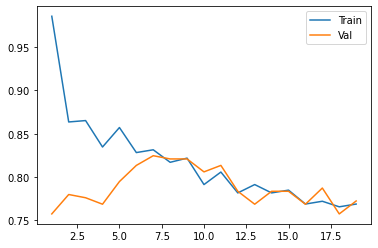

In [114]:
# 이웃의 수마다의 정확도
train_acc = []
val_acc = []

# 사용할 이웃의 범위 값들을 정의
neighbor = range(1,20)

for n in neighbor:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train2, y_train2)
    
    # 이웃의 수마다의 훈련데이터 정확도와 테스트데이터 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train2,y_train2))
    val_acc.append(knn_model.score(X_val,y_val))

plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, val_acc, label="Val")
plt.legend()

In [115]:
# 이웃의 수마다의 정확도
train_acc = []
val_acc = []

# 사용할 이웃의 범위 값들을 정의
neighbor = range(1,20)

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train2, y_train2)
    
# 이웃의 수마다의 훈련데이터 정확도와 테스트데이터 정확도를 리스트에 저장
train_acc.append(knn_model.score(X_train2,y_train2))
val_acc.append(knn_model.score(X_val,y_val))



In [116]:
knn_model4 = KNeighborsClassifier(n_neighbors=11)
knn_model4.fit(X_train2,y_train2)
knn_pre4 = knn_model4.predict(X_test)
submission['Survived'] = knn_pre4
submission.to_csv("./data/knn_pre5.csv", index=False)

In [117]:
# Decision_Tree => Max_Depth
# model_dt2 = DecisionTreeClassifier(max_depth=3)
# model_dt2.fit(X_train, y_train)

# print("훈련정확도 :", model_dt2.score(X_train, y_train))
# print("테스트정확도 :", model_dt2.score(X_val, y_val))

# from sklearn.tree import export_graphviz
# import graphviz

# export_graphviz(model_dt2, out_file="tree2.dot",
#                 class_names=["독", "식용"],
#                 feature_names=one_hot_X.columns,
#                 impurity=True,
#                 filled=True,
#                 rounded=True)
# with open("tree2.dot", encoding="UTF8") as f:
#     dot_graph = f.read()
    
# display(graphviz.Source(dot_graph))

#### KNN 튜닝

In [118]:
train_score = []  # 훈련데이터의 점수
test_score = []   # 검증데이터의 점수가 들어갈 리스트

for n in range(1,20):
    # 이웃을 1~19개까지 변경하면서 모델생성
    model = KNeighborsClassifier(n_neighbors=n)
    # 모델 학습
    model.fit(X_train2,y_train2)
    # 훈련데이터에 대한 점수 누적
    train_score.append(model.score(X_train2,y_train2))
    # 검증데이터에 대한 점수 누적
    test_score.append(model.score(X_val,y_val))

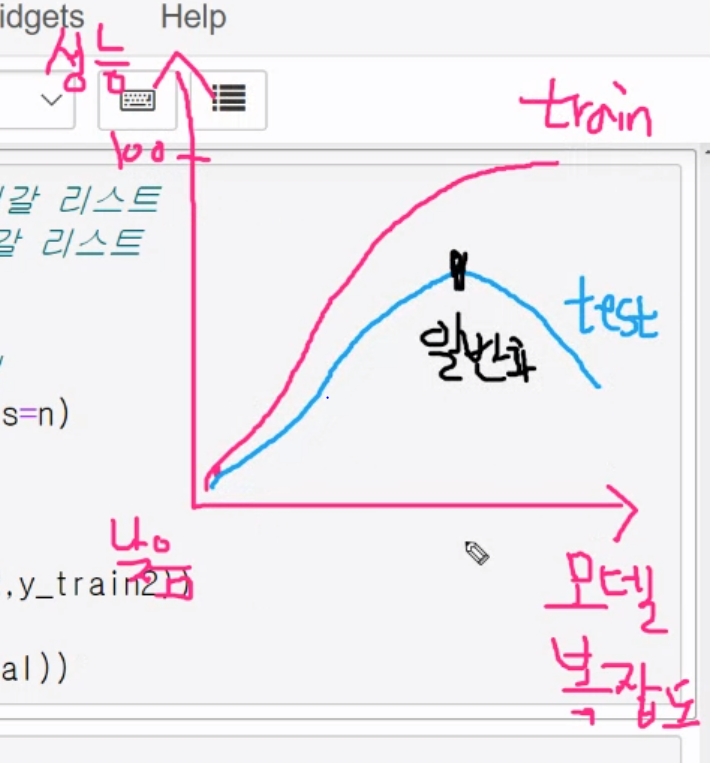

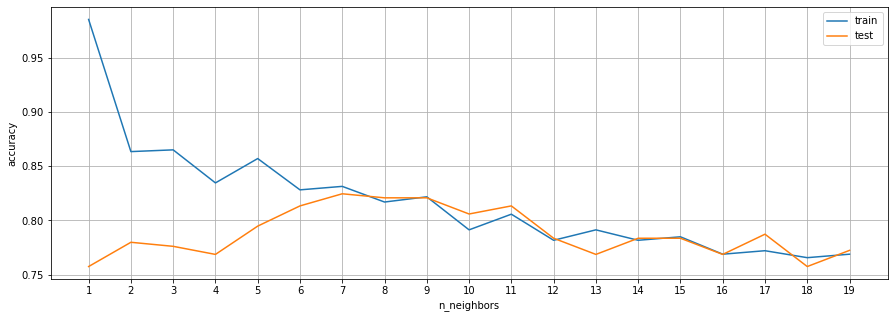

In [119]:
plt.figure(figsize=(15,5))
plt.plot(range(1,20), train_score, label='train')
plt.plot(range(1,20), test_score, label='test')
plt.xticks(range(1,20))
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.show()

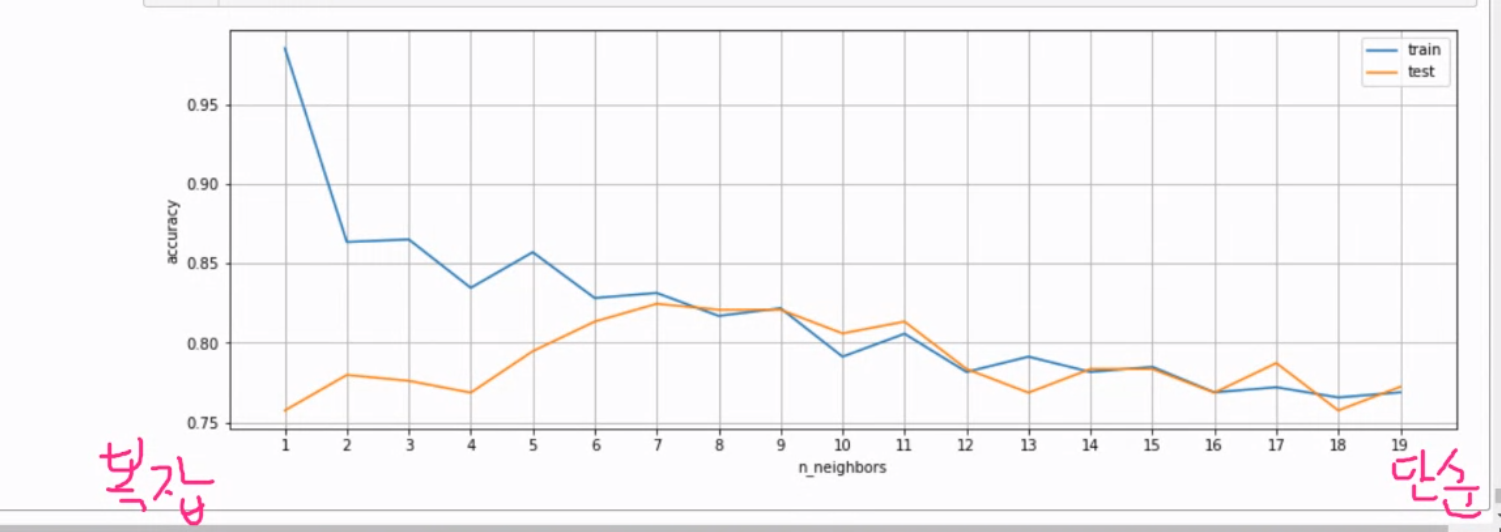

- knn은 그래프를 반대로 봐야함
- n_neighbors = 7 에서 이하로 갈 때 일반화모델

#### DecisionTree 튜닝

In [120]:
# 교차검증함수
from sklearn.model_selection import cross_val_score

In [121]:
# random_state는 협업할 때 값 고정 할 때
test_score = []
for d in range(1,30):
    model = DecisionTreeClassifier(max_depth=d, random_state=720)
    result = cross_val_score(model, X_train, y_train, cv=5)
    test_score.append(result.mean())

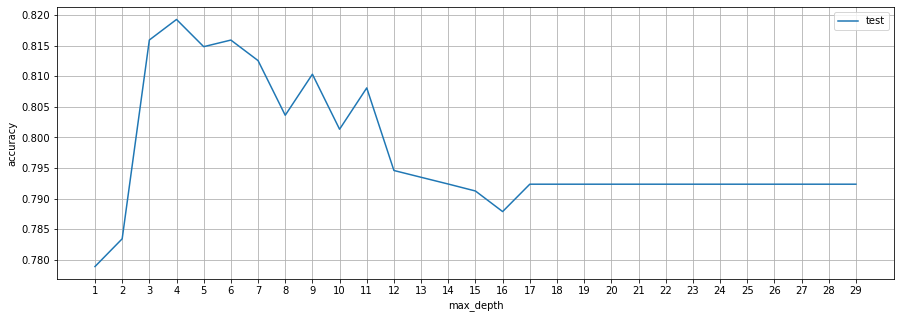

In [122]:
plt.figure(figsize=(15,5))
plt.plot(range(1,30), test_score, label='test')
plt.xticks(range(1,30))
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()

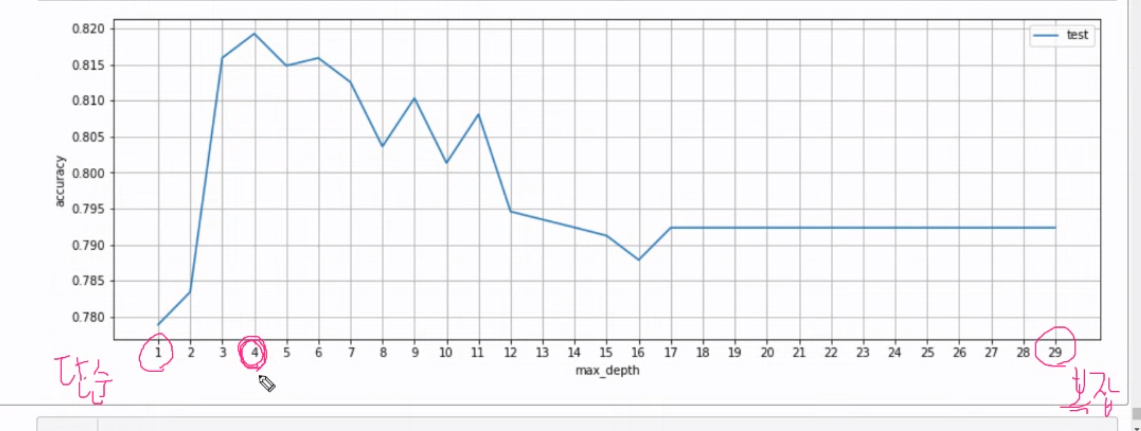

## 모델 평가
- KNN의 이웃 수 : 7
- DecisionTree의 최대깊이 : 4

In [123]:
final_knn = KNeighborsClassifier(n_neighbors=7)
final_tree = DecisionTreeClassifier(max_depth=4, random_state=720)

In [124]:
final_knn.fit(X_train,y_train)
final_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=720)

In [125]:
knn_pre = final_knn.predict(X_test)
tree_pre = final_tree.predict(X_test)

### 성능개선을 위해 고려해볼 사항
1. 특성선택
2. 데이터 확보
3. 전처리 작업 변경(결측치, 특성공학, 스케일링 등)
4. 모델 변경 - 앙상블

# 앙상블
1. 보팅(voting)
   - 서로 다른 알고리즘의 모델 여러개를 이용해서 투표로 예측결과를 만들어 낸다.
   - 하드보팅 : 모델의 최종 예측결과로 투표
   - 소프트보팅 : 모델의 확률결과로 투표
2. 배깅(bagging)
   - 같은 알고리즘 모델 여러개를 이용해서 투표를 진행
   - 여러개의 모델들이 학습할 때 다른 의견이 나올 수 있도록 부트스트래핑 작없을 한다.
   - 매번 모델이 학습할때마다 랜덤하게 데이터를 추출하되, 중복된 추출을 허용한다.
   - 랜덤포레스트 : DecisionTree의 배깅 모델
3. 부스팅(boosting)
   - 같은 알고리즘 모델 여러개를 이용해서 투표를 진행
   - 이전 모델이 잘못 학습한 결과를 다음 모델이 반영해서 학습하도록하는 기법
   - 학습 진행이 순차적으로 일어나기 때문에 상대적으로 속도가 느리다.

## Random Forest(랜덤포레스트)

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf_model = RandomForestClassifier(n_estimators=100,   # 배깅할 모델 개수
                                  max_features=0.6,   # 각 모델이 랜덤하게 사용할 특성 수
                                  max_depth=8,        # 각 모델의 최대 깊이
                                  min_samples_leaf=10, # 리프노드의 최소샘플 수
                                  random_state=721    # 난수 고정
                                 )

In [128]:
rf_rs = cross_val_score(rf_model,X_train,y_train,cv=5)
rf_rs

array([0.81564246, 0.80898876, 0.84831461, 0.79775281, 0.83707865])

### 그리드서치
- 앙상블 모델의 경우 하이퍼파라미터 수가 엄청 많다.
- 각 파라미터를 독립적으로 튜닝하는건 불가능하다.
- 많은 양의 파라미터를 동시에 튜닝하기위한 함수로 그리드서치를 지원한다.


In [129]:
from sklearn.model_selection import GridSearchCV     # CV : 교차검증의 약자

In [130]:
# 탐색하고 싶은 하이퍼파라미터 조합을 딕셔너리로 생성
param_grid = {
    'max_depth' : [5,10,15,20],
    'n_estimators' : [100, 150, 200, 250],
    'max_features' : [0.5, 0.7],
    'min_samples_leaf' : [10, 20, 25]
}

In [131]:
model = RandomForestClassifier(random_state=721)
# 튜닝할 모델, 사용할 파라미터, 교차검증 횟수
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)

In [132]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=721),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7],
                         'min_samples_leaf': [10, 20, 25],
                         'n_estimators': [100, 150, 200, 250]})

In [133]:
# 최고의 조합 확인
grid.best_params_

{'max_depth': 5,
 'max_features': 0.7,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [134]:
# 최고 점수 확인
grid.best_score_

0.8338945005611672

In [135]:
# 최고 조합으로 학습완료된 모델
best_model = grid.best_estimator_

In [136]:
pre = best_model.predict(X_test)

In [137]:
submission['Survived'] = pre
submission.to_csv("./data/rf_pre.csv", index=False)

## boosting 라이브러리 설치

In [138]:
!pip install xgboost

In [139]:
!pip install lightgbm

In [140]:
from xgboost import XGBClassifier

In [144]:
xgb_model = XGBClassifier(booster="gbtree",   # 모델의 종류
                          n_estimators=100,   # 앙상블 모델 갯수
                          learning_rate=0.1,  # 학습률
                          max_depth=4,        # 최대깊이 (일반적으로 깊게 설정 x)
                          gamma= 0.2          # 키우면 모델 단순, 작아지면 모델이 복잡
                         )